# 数据处理

In [2]:
import pandas as pd
import numpy as np
import time
import sqlite3


In [3]:
data_home = './SampleCode/'

In [4]:
triplet_dataset = pd.read_csv(filepath_or_buffer = data_home +'train_triplets.txt', 
                              sep='\t', header=None, 
                              names=['user','song','play_count'])

In [5]:
#四千多万行，数据太大可以考虑只选择部分
triplet_dataset.shape

(48373586, 3)

In [6]:
#int64或者float64可以考虑转32，这样节约内存
triplet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48373586 entries, 0 to 48373585
Data columns (total 3 columns):
user          object
song          object
play_count    int64
dtypes: int64(1), object(2)
memory usage: 1.1+ GB


In [7]:
#用户id和歌曲名都是加密过的，用户id无所谓，歌曲名后面我们想办法转明文
triplet_dataset.head()

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


## 对每一个用户，分别统计他的播放总量

In [8]:
out_dict = {}
with open(data_home + 'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        user = line.split('\t')[0]
        play_count = int(line.split('\t')[2])
        #如果用户以前就有过播放行为，累加
        if user in out_dict:
            play_count += out_dict[user]
            out_dict.update({user:play_count})
        #如果用户第一次统计播放行为，赋值
        out_dict.update({user:play_count})
output_list = [{'user':k,'play_count':v} for k,v in out_dict.items()]

In [9]:
play_count_df = pd.DataFrame(output_list)
play_count_df

,play_count,user
0,142,b80344d063b5ccb3212f76538f3d9e43d87dca9e
1,38,85c1f87fea955d09b4bec2e36aee110927aedf9a
2,14,bd4c6e843f00bd476847fb75c47b4fb430a06856
3,78,8937134734f869debcab8f23d77465b4caaa85df
4,94,969cc6fb74e076a68e36a04409cb9d3765757508
5,95,4bd88bfb25263a75bbdd467e74018f4ae570e5df
6,73,e006b1a48f466bf59feefed32bec6494495a4436
7,24,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec
8,58,9bb911319fbc04f01755814cb5edb21df3d1a336
9,164,b64cdd1a0bd907e5e00b39e345194768e330d652


In [10]:
#以播放数量为指标排序，方便过滤掉播放量太少的用户
paly_count_df = play_count_df.sort_values(by = "play_count", ascending=False)

In [11]:
paly_count_df.to_csv(path_or_buf='user_playcount_df.csv', index = False)

## 对于每一首歌，分别统计它的播放总量

In [12]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        song = line.split('\t')[1]
        play_count = int(line.split('\t')[2])
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)


In [13]:
song_count_df.to_csv(path_or_buf='song_playcount_df.csv', index = False)

In [14]:
#取前10个点击数最多的用户看看
play_count_df = pd.read_csv(filepath_or_buffer='user_playcount_df.csv')
paly_count_df.head(10)

,play_count,user
669980,13132,093cb74eb3c517c5179ae24caf0ebec51b24d2a2
402687,9884,119b7c88d58d0c6eb051365c103da5caf817bea6
964856,8210,3fa44653315697f42410a30cb766a4eb102080bb
462404,7015,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b
991089,6494,d7d2d888ae04d16e994d6964214a1de81392ee04
234384,6472,4ae01afa8f2430ea0704d502bc7b57fb52164882
824276,6150,b7c24f770be6b802805ac0e2106624a517643c17
225988,5656,113255a012b2affeab62607563d03fbdf31b08e7
30701,5620,6d625c6557df84b60d90426c0116138b617b9449
355770,5602,99ac3d883681e21ea68071019dba828ce76fe94d


In [15]:
song_count_df = pd.read_csv(filepath_or_buffer='song_playcount_df.csv')
song_count_df.head(10)

,play_count,song
0,726885,SOBONKR12A58A7A7E0
1,648239,SOAUWYT12A81C206F1
2,527893,SOSXLTC12AF72A7F54
3,425463,SOFRQTD12A81C233C0
4,389880,SOEGIYH12A6D4FC0E3
5,356533,SOAXGDH12A8C13F8A1
6,292642,SONYKOW12AB01849C9
7,274627,SOPUCYA12A8C13A694
8,268353,SOUFTBI12AB0183F65
9,244730,SOVDSJC12A58A7A271


## 取其中一部分数（按大小排好序的了，这些应该是比较重要的数据），作为我们的实验数据

In [16]:
total_play_count = sum(song_count_df.play_count)
#取前10万个用户拿出来看看，发现点击数已经占到总数的40%，说明很多用户都是惰性用户，可以不考虑他们，可以设置阀值比如60%
print(float(play_count_df.head(n=100000).play_count.sum()) / total_play_count)


0.408807280500655


In [17]:
print(float(song_count_df.head(n=30000).play_count.sum())/total_play_count)

0.7839315366645269


取10W个用户，3W首歌，基本满足要求

In [18]:
play_count_subset = play_count_df.head(n = 100000)
song_count_subset = song_count_df.head(n=30000)

过滤掉其他用户

In [19]:
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt',sep='\t', 
                              header=None, names=['user','song','play_count'])

#isin判断是否在user_subset里，相当于做过滤，只要前10万个用户

In [20]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset)]
#删除释放内存
del(triplet_dataset)
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [21]:
triplet_dataset_sub_song.to_csv(path_or_buf=data_home+'triplet_dataset_sub_song.csv', index=False)

In [22]:
#最终数据量
triplet_dataset_sub_song.shape

(10774558, 3)

In [23]:
triplet_dataset_sub_song.head(n=10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


## 加入音乐详细信息

In [24]:
#.db文件需要稍微处理下 转换成csv
#想把歌的名字转化成明文，用这个文件：track_metadata.db
conn = sqlite3.connect(data_home+'track_metadata.db')
cur = conn.cursor()
#找到表名为songs
cur.execute("select name from sqlite_master where type='table'")
cur.fetchall()

[('songs',)]

In [25]:
#用sql把现有的表和track_metadata.db文件连接起来
track_metadata_df = pd.read_sql(con = conn, sql = 'select * from songs')
#把连接产生的新表进行过滤，只有在song——subset里的歌才是我们关心的
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]

In [26]:
track_metadata_df_sub.to_csv(path_or_buf=data_home+'track_metadata_df_sub.csv', index=False)

In [27]:
track_metadata_df_sub.shape

(30447, 14)

In [28]:
triplet_dataset_sub_song = pd.read_csv(filepath_or_buffer=data_home+'triplet_dataset_sub_song.csv',encoding = "ISO-8859-1")
track_metadata_df_sub = pd.read_csv(filepath_or_buffer=data_home+'track_metadata_df_sub.csv',encoding = "ISO-8859-1")

In [29]:
triplet_dataset_sub_song.head()

,user,song,play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7


In [30]:
track_metadata_df_sub.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
1,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
2,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
3,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
4,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0


In [31]:
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_mbid'])
#drop_duplicates去掉重复
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])

In [32]:
#pd可以直接写sql
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how='left', left_on='song', right_on='song_id')

In [33]:
#把列名从play_conut改成listen_count
triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'},inplace = True)

In [34]:
#去掉我们暂时不考虑的信息
del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

In [35]:
triplet_dataset_sub_song_merged.head(n=10)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0


# 瞅瞅音乐数据集的情况，但是和推荐关系不大

##基于热度推荐

In [36]:
#统计播放总数，且重新index
popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()
#按播放次数排序，取前20个
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending = False).head(n=20)

In [37]:
popular_songs_top_20 

,title,listen_count
27314,You're The One,249477
25070,Undo,191211
18636,Revelry,173469
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,124999
19580,Sehr kosmisch,124945
5780,Dog Days Are Over (Radio Edit),119771
3629,Canada,113794
11575,Invalid,100115
19542,Secrets,97445
3796,Catch You Baby (Steve Pitron & Max Sanna Radio...,89158


In [38]:
import matplotlib.pyplot as plt2; plt2.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt2
%matplotlib inline


In [39]:
objects = list(popular_songs_top_20['title'])

In [40]:
objects

["You're The One",
 'Undo',
 'Revelry',
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 'Sehr kosmisch',
 'Dog Days Are Over (Radio Edit)',
 'Canada',
 'Invalid',
 'Secrets',
 'Catch You Baby (Steve Pitron & Max Sanna Radio Edit)',
 'ReprÃ©sente',
 "Ain't Misbehavin",
 'SinceritÃ© Et Jalousie',
 'The Gift',
 'Hey_ Soul Sister',
 'Fireflies',
 "I CAN'T GET STARTED",
 'Marry Me',
 'Tive Sim',
 'Use Somebody']

In [41]:
y_pos = np.arange(len(objects))

In [42]:
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [43]:
performance = list(popular_songs_top_20['listen_count'])


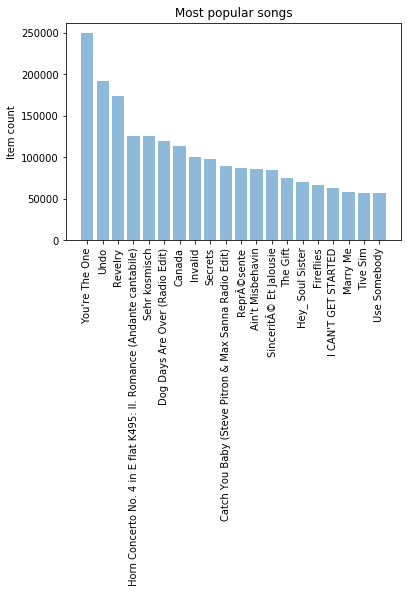

In [44]:
plt2.bar(y_pos, performance, align = 'center', alpha = 0.5)
plt2.xticks(y_pos, objects, rotation='vertical')
plt2.ylabel('Item count')
plt2.title('Most popular songs')
plt2.show()

### 最受欢迎的releases

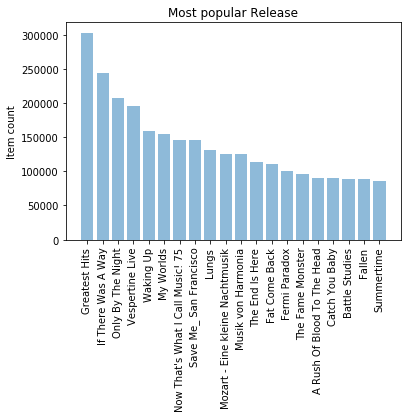

In [45]:
popular_release = triplet_dataset_sub_song_merged[['release','listen_count']].groupby('release').sum().reset_index()
popular_release_top_20 = popular_release.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_release_top_20['release']))
y_pos = np.arange(len(objects))
performance = list(popular_release_top_20['listen_count'])
 
plt2.bar(y_pos, performance, align='center', alpha=0.5)
plt2.xticks(y_pos, objects, rotation='vertical')
plt2.ylabel('Item count')
plt2.title('Most popular Release')
 
plt2.show()

## 最受欢迎的歌手

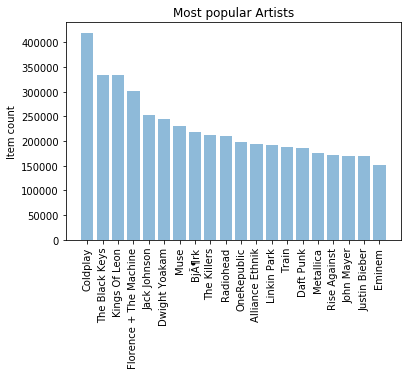

In [46]:
popular_artist = triplet_dataset_sub_song_merged[['artist_name','listen_count']].groupby('artist_name').sum().reset_index()
popular_artist_top_20 = popular_artist.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_artist_top_20['artist_name']))
y_pos = np.arange(len(objects))
performance = list(popular_artist_top_20['listen_count'])
 
plt2.bar(y_pos, performance, align='center', alpha=0.5)
plt2.xticks(y_pos, objects, rotation='vertical')
plt2.ylabel('Item count')
plt2.title('Most popular Artists')
 
plt2.show()

## 用户播放量的分布

In [47]:
user_song_count_distribution = triplet_dataset_sub_song_merged[['user','title']].groupby('user').count().reset_index().sort_values(by='title', ascending = False)

In [48]:
user_song_count_distribution.title.describe()

count    99996.000000
mean       107.749890
std         79.742561
min          1.000000
25%         53.000000
50%         89.000000
75%        141.000000
max       1189.000000
Name: title, dtype: float64

In [49]:
x = user_song_count_distribution.title

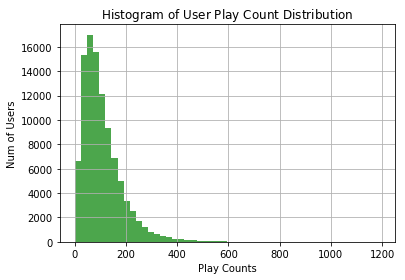

In [50]:
n, bins, patches = plt2.hist(x, 50, facecolor = 'green', alpha=0.7)
plt2.xlabel('Play Counts')
plt2.ylabel('Num of Users')
plt2.title(r'$\mathrm{Histogram\ of\ User\ Play\ Count\ Distribution}\ $')
plt2.grid(True)
plt2.show()

## 简单暴力，排行榜单推荐，越热门越推荐

In [51]:
import SampleCode.Recommenders as Recommenders
from sklearn.model_selection import train_test_split

In [52]:
triplet_dataset_sub_song_merged_set = triplet_dataset_sub_song_merged
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_set, test_size = 0.40, random_state=0)

In [53]:
train_data.head()

,user,song,listen_count,title,release,artist_name,year
1901799,28866ea8a809d5d46273cd0989c5515c660ef8c7,SOEYVHS12AB0181D31,1,Monster,The Fame Monster,Lady GaGa,2009
4815185,c9608a24a2a40e0ec38993a70532e7bb56eff22b,SOKIYKQ12A8AE464FC,2,Fight For Your Life,Made In NYC,The Casualties,2000
10513026,24f0b09c133a6a0fe42f097734215dceb468d449,SOETFVO12AB018DFF3,1,Free Style (feat. Kevo_ Mussilini & Lyrical 187),A Bad Azz Mix Tape,Z-RO,0
2659073,4da3c59a0af73245cea000fd5efa30384182bfcb,SOAXJOU12A6D4F6685,1,Littlest Things,Alright_ Still,Lily Allen,2006
5506263,b46c5ed385cad7ecea8af6214f440d19de6eb6c2,SOXBCAY12AB0189EE0,1,La trama y el desenlace,Amar la trama,Jorge Drexler,2010


In [54]:
train_data = triplet_dataset_sub_song_merged 
user_id = 'user'
item_id = 'title'
train_data_grouped = train_data.groupby([item_id]).agg({user_id:'count'}).reset_index()
train_data_grouped.rename(columns = {user_id: 'score'},inplace=True)
#排序
train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending = [0,1])
#根据分值得到排名
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method = 'first')

In [55]:
popularity_recommendations = train_data_sort.head(20)
popularity_recommendations

,title,score,Rank
19580,Sehr kosmisch,18626,1.0
5780,Dog Days Are Over (Radio Edit),17635,2.0
27314,You're The One,16085,3.0
19542,Secrets,15138,4.0
18636,Revelry,14945,5.0
25070,Undo,14687,6.0
7530,Fireflies,13085,7.0
9640,Hey_ Soul Sister,12993,8.0
25216,Use Somebody,12793,9.0
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,12346,10.0


In [73]:
from sklearn.model_selection import train_test_split
import Recommenders as Recommenders

In [57]:
#只取前5000个数据，简化计算做个demo
song_count_subset = song_count_df.head(n=5000)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)
#过滤
triplet_dataset_sub_song_merged_sub = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]

In [58]:
triplet_dataset_sub_song_merged_sub.head()

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


In [59]:
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_sub, test_size = 0.30, random_state=0)

In [75]:
#其实这个类的__init__什么都没做
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user', 'title')
user_id = list(train_data.user)[7]



In [76]:
user_id

'a974fc428825ed071281302d6976f59bfa95fe7e'

In [77]:
train_data.head()

,user,song,listen_count,title,release,artist_name,year
5807773,c38286f002a3b7848344fe7c55e99481cc2f6773,SONJILQ12A67020456,1,Californication (Album Version),Californication,Red Hot Chili Peppers,1999
3116918,2af814d32d7f33eca623b8a608650f8ef54fe86f,SOZYSDT12A8C13BFD7,7,Under Pressure,Queen On Fire - Live At The Bowl,Queen,1986
5160770,03833b59413f1bff20c10c1dd8c4213d5dc1fe46,SOBOAFP12A8C131F36,1,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
6382580,f4c17680b7cb812e3ccfc417357419d2006d10af,SOVXUKQ12A67021875,9,Kids With Guns,Demon Days,Gorillaz,2005
9871541,1fe1edc9d3ce1d968a70f6a43bac8588336ca2e5,SOCGWCK12A67020F39,1,We Belong Together,R&B Divas,Mariah Carey,2005


In [78]:
#返回了这个user有过行为的items
user_items = is_model.get_user_items(user_id)

In [79]:
is_model.recommend(user_id)

No. of unique songs for the user: 66
no. of unique songs in the training set: 4879
Non zero values in cooccurence_matrix :290327


,user_id,song,score,rank
0,a974fc428825ed071281302d6976f59bfa95fe7e,Put Your Head On My Shoulder (Album Version),0.026334,1
1,a974fc428825ed071281302d6976f59bfa95fe7e,The Strength To Go On,0.025176,2
2,a974fc428825ed071281302d6976f59bfa95fe7e,Come Fly With Me (Album Version),0.024447,3
3,a974fc428825ed071281302d6976f59bfa95fe7e,Moondance (Album Version),0.024118,4
4,a974fc428825ed071281302d6976f59bfa95fe7e,Kotov Syndrome,0.023311,5
5,a974fc428825ed071281302d6976f59bfa95fe7e,Use Somebody,0.023104,6
6,a974fc428825ed071281302d6976f59bfa95fe7e,Lucky (Album Version),0.022930,7
7,a974fc428825ed071281302d6976f59bfa95fe7e,Secrets,0.022889,8
8,a974fc428825ed071281302d6976f59bfa95fe7e,Clocks,0.022562,9
9,a974fc428825ed071281302d6976f59bfa95fe7e,Sway (Album Version),0.022359,10


## SVD矩阵分解做推荐

In [176]:
triplet_dataset_sub_song_merged_sum_df = triplet_dataset_sub_song_merged[['user','listen_count']].groupby('user').sum().reset_index()
triplet_dataset_sub_song_merged_sum_df.rename(columns={'listen_count':'total_listen_count'},inplace=True)
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song_merged,triplet_dataset_sub_song_merged_sum_df)
triplet_dataset_sub_song_merged.head()

,user,song,listen_count,title,release,artist_name,year,total_listen_count,fractional_play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004,329,0.036474
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,329,0.003040
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0,329,0.003040
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993,329,0.003040
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0,329,0.021277


In [177]:
#计算歌曲被当前用户播放量 / 用户播放总量 当做用户对这个歌的打分值
triplet_dataset_sub_song_merged['fractional_play_count'] = triplet_dataset_sub_song_merged['listen_count']/triplet_dataset_sub_song_merged['total_listen_count']

In [178]:
#随便找了一个用户，展示了指定列,做展示
triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.user =='d6589314c0a9bcbca4fee0c93b14bc402363afea'][['user','song','listen_count','fractional_play_count']].head()

,user,song,listen_count,fractional_play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,0.036474
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,0.003040
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,0.003040
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,0.003040
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,0.021277


In [179]:
triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.listen_count == 12]['user']

0           d6589314c0a9bcbca4fee0c93b14bc402363afea
58          5a905f000fc1ff3df7ca807d57edb608863db05d
174         5a905f000fc1ff3df7ca807d57edb608863db05d
239         5a905f000fc1ff3df7ca807d57edb608863db05d
329         5a905f000fc1ff3df7ca807d57edb608863db05d
584         baf47ed8da24d607e50d8684cde78b923538640f
1194        1a849df9dabb15845eb932d46d81e2fd77176786
1217        1a849df9dabb15845eb932d46d81e2fd77176786
1310        b61afb42335287239bd40e1dea50d849cbf8a9a9
1621        95942345306393998eb3a051ae5fa3c4d5afbaa4
1697        5d5e0142e54c3bb7b69f548c2ee55066c90700eb
2211        8dcb524ff75e0ad0f0a80aaccadf7bbaa3b89a41
2230        8dcb524ff75e0ad0f0a80aaccadf7bbaa3b89a41
2309        8dcb524ff75e0ad0f0a80aaccadf7bbaa3b89a41
2517        18dc95f354220b343e98ebbb7c8564291284ed9f
3009        e21477efb83bd323205ce6f5bd662f3df9d477e5
3451        be0a4b64e9689c46e94b5a9a9c7910ee61aeb16f
3953        94d5bdc37683950e90c56c9b32721edb5d347600
4019        ec25e3d78ea8374869a772dc58bb903528

In [180]:
from scipy.sparse import coo_matrix

In [181]:
#名字简短点
small_set = triplet_dataset_sub_song_merged

#drop_duplicate方法是对DataFrame格式的数据，去除特定列下面的重复行。返回DataFrame格式的数据。reset_index()新增index
user_codes = small_set.user.drop_duplicates().reset_index()
song_codes = small_set.song.drop_duplicates().reset_index()
small_set.user.drop_duplicates()

0           d6589314c0a9bcbca4fee0c93b14bc402363afea
58          5a905f000fc1ff3df7ca807d57edb608863db05d
501         baf47ed8da24d607e50d8684cde78b923538640f
678         a58de017cbeda1763ea002fe027ed41b4ed53109
841         3f152d355d53865a2ca27ac5ceeffb7ebaea0a26
944         732f88be38fae217f8ab7e24c20dd072436e3e40
1163        1a849df9dabb15845eb932d46d81e2fd77176786
1245        b61afb42335287239bd40e1dea50d849cbf8a9a9
1436        3ff7a31452eeabd7a4e07f0d243c674e3d0adf46
1501        66166f4f57bb897f1f8e2aae6f53f776088f43d8
1529        95942345306393998eb3a051ae5fa3c4d5afbaa4
1662        5d5e0142e54c3bb7b69f548c2ee55066c90700eb
1733        884209a41deb55df792f074bccf8af1c1c31768b
1945        8814f5d1f1d7177aa2efb6de6454504f3bb7b7bc
1964        9b887e10a4711486085c4fae2d2599fc0d2c484d
2179        8dcb524ff75e0ad0f0a80aaccadf7bbaa3b89a41
2326        e4c05157f8cebdf3b9d689c441ba97c5ed5db05b
2405        18dc95f354220b343e98ebbb7c8564291284ed9f
2595        85952991b8e3ca5803a08b0b2f9c6d71ab

In [182]:
user_codes

,index,user
0,0,d6589314c0a9bcbca4fee0c93b14bc402363afea
1,58,5a905f000fc1ff3df7ca807d57edb608863db05d
2,501,baf47ed8da24d607e50d8684cde78b923538640f
3,678,a58de017cbeda1763ea002fe027ed41b4ed53109
4,841,3f152d355d53865a2ca27ac5ceeffb7ebaea0a26
5,944,732f88be38fae217f8ab7e24c20dd072436e3e40
6,1163,1a849df9dabb15845eb932d46d81e2fd77176786
7,1245,b61afb42335287239bd40e1dea50d849cbf8a9a9
8,1436,3ff7a31452eeabd7a4e07f0d243c674e3d0adf46
9,1501,66166f4f57bb897f1f8e2aae6f53f776088f43d8


In [183]:
song_codes

,index,song
0,0,SOADQPP12A67020C82
1,1,SOAFTRR12AF72A8D4D
2,2,SOANQFY12AB0183239
3,3,SOAYATB12A6701FD50
4,4,SOBOAFP12A8C131F36
5,5,SOBONKR12A58A7A7E0
6,6,SOBZZDU12A6310D8A3
7,7,SOCAHRT12A8C13A1A4
8,8,SODASIJ12A6D4F5D89
9,9,SODEAWL12AB0187032


In [184]:
#换个列名
user_codes.rename(columns={'index':'user_index'}, inplace=True)
song_codes.rename(columns={'index':'song_index'}, inplace=True)

In [185]:
song_codes

,song_index,song
0,0,SOADQPP12A67020C82
1,1,SOAFTRR12AF72A8D4D
2,2,SOANQFY12AB0183239
3,3,SOAYATB12A6701FD50
4,4,SOBOAFP12A8C131F36
5,5,SOBONKR12A58A7A7E0
6,6,SOBZZDU12A6310D8A3
7,7,SOCAHRT12A8C13A1A4
8,8,SODASIJ12A6D4F5D89
9,9,SODEAWL12AB0187032


In [188]:
#增加一个列，我觉得这步可以省去，因为index和user-index一样的
song_codes['so_index_value'] = list(song_codes.song_index)
user_codes['us_index_value'] = list(user_codes.user_index)

In [189]:
user_codes

,user_index,user,us_index_value
0,0,d6589314c0a9bcbca4fee0c93b14bc402363afea,0
1,58,5a905f000fc1ff3df7ca807d57edb608863db05d,58
2,501,baf47ed8da24d607e50d8684cde78b923538640f,501
3,678,a58de017cbeda1763ea002fe027ed41b4ed53109,678
4,841,3f152d355d53865a2ca27ac5ceeffb7ebaea0a26,841
5,944,732f88be38fae217f8ab7e24c20dd072436e3e40,944
6,1163,1a849df9dabb15845eb932d46d81e2fd77176786,1163
7,1245,b61afb42335287239bd40e1dea50d849cbf8a9a9,1245
8,1436,3ff7a31452eeabd7a4e07f0d243c674e3d0adf46,1436
9,1501,66166f4f57bb897f1f8e2aae6f53f776088f43d8,1501


In [190]:
song_codes

,song_index,song,so_index_value
0,0,SOADQPP12A67020C82,0
1,1,SOAFTRR12AF72A8D4D,1
2,2,SOANQFY12AB0183239,2
3,3,SOAYATB12A6701FD50,3
4,4,SOBOAFP12A8C131F36,4
5,5,SOBONKR12A58A7A7E0,5
6,6,SOBZZDU12A6310D8A3,6
7,7,SOCAHRT12A8C13A1A4,7
8,8,SODASIJ12A6D4F5D89,8
9,9,SODEAWL12AB0187032,9


In [191]:
#和下面那步放在一个jupyter框里就会出问题，奇怪
small_set = pd.merge(small_set, user_codes, how='left')
small_set

,user,song,listen_count,title,release,artist_name,year,total_listen_count,fractional_play_count,user_index,us_index_value
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004,329,0.036474,0,0
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,329,0.003040,0,0
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0,329,0.003040,0,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993,329,0.003040,0,0
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0,329,0.021277,0,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990,329,0.079027,0,0
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986,329,0.021277,0,0
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007,329,0.015198,0,0
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985,329,0.003040,0,0
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0,329,0.024316,0,0


In [192]:
small_set = pd.merge(small_set, song_codes, how='left')
small_set

,user,song,listen_count,title,release,artist_name,year,total_listen_count,fractional_play_count,user_index,us_index_value,song_index,so_index_value
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004,329,0.036474,0,0,0,0
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,329,0.003040,0,0,1,1
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0,329,0.003040,0,0,2,2
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993,329,0.003040,0,0,3,3
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0,329,0.021277,0,0,4,4
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990,329,0.079027,0,0,5,5
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986,329,0.021277,0,0,6,6
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007,329,0.015198,0,0,7,7
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985,329,0.003040,0,0,8,8
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0,329,0.024316,0,0,9,9


In [193]:
mat_candidate = small_set[['us_index_value','so_index_value','fractional_play_count']]
mat_candidate

,us_index_value,so_index_value,fractional_play_count
0,0,0,0.036474
1,0,1,0.003040
2,0,2,0.003040
3,0,3,0.003040
4,0,4,0.021277
5,0,5,0.079027
6,0,6,0.021277
7,0,7,0.015198
8,0,8,0.003040
9,0,9,0.024316


In [194]:
#直接从small——set取也可以
data_array = mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.so_index_value.values

In [195]:
#coo的方式储存矩阵
data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)

In [197]:
data_sparse.shape

(10774551, 3681755)

In [198]:
#随便拿个数据看看
user_codes[user_codes.user =='2a2f776cbac6df64d6cb505e7e834e01684673b6']

,user_index,user,us_index_value
27516,2981434,2a2f776cbac6df64d6cb505e7e834e01684673b6,2981434


In [199]:
import math as mt
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix